In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [53]:
s = 0.07
r_b = 0.055
r_po = 0.02

lambda_g = np.arange(0.5, 3.5, 0.5)
lambda_s = 3

R_p = 0.05

In [54]:
theta_1 = s / (2*r_b)
theta_2 = r_b / r_po
theta_3 = 1 / (2*theta_1*theta_2)

sigma = (lambda_g - lambda_s) / (lambda_g + lambda_s)

beta = 2 * np.pi * lambda_g * R_p

In [76]:
R_b_multipole0 = (beta + np.log(theta_2 /(2*theta_1*(1-theta_1**4)**sigma))) / (4*np.pi*lambda_g)
R_g_multipole0 = R_b_multipole0 - R_p / 2

R_b_multipole1 = (beta + np.log(theta_2 /(2*theta_1*(1-theta_1**4)**sigma)) - \
                 theta_3**2 * (1 - 4*sigma*theta_1**4 / (1-theta_1**4))**2 / ( \
                    (1+beta) / (1-beta) + theta_3**2 * (1 + 16*sigma*theta_1**4) /(1-theta_1**4)**2 ) \
                 ) / (4*np.pi*lambda_g)
R_g_multipole1 = R_b_multipole1 - R_p / 2

R_g_bauer = ( (1.601-0.888*theta_1) / np.cosh( 0.5*theta_2 + (2*theta_2)**(-1) - theta_1 /(4*theta_3))) / \
(4*np.pi*lambda_g)

B_0, B_1 = 21.91, -0.3796
S_b = B_0 * (r_b/r_po)**B_1
R_g_paul = 1 / (S_b*lambda_g)

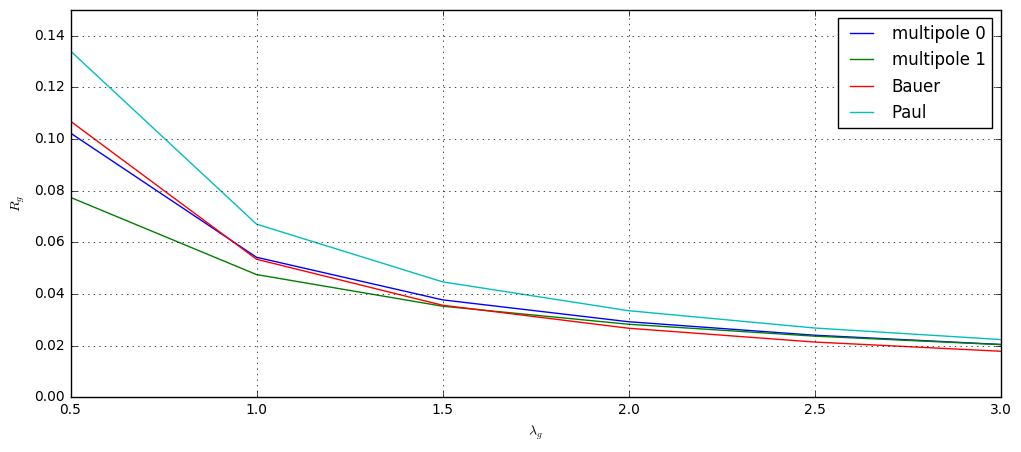

In [78]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

ax.grid(True)
ax.set_xlabel(r'$\lambda_g$')
ax.set_ylabel(r'$R_g$')
ax.set_ylim([0,0.15])


ax.plot(lambda_g, R_g_multipole0, label='multipole 0')
ax.plot(lambda_g, R_g_multipole1, label='multipole 1')
ax.plot(lambda_g, R_g_bauer, label='Bauer')
ax.plot(lambda_g, R_g_paul, label='Paul')

ax.legend()